# Laboratorio 1

#### Rodrigo Zea - 17058

# Importación de librerías, lectura de datos.

In [1]:
# Importar numpy
import numpy as np
from matplotlib import pyplot as plt

# Almaenamos la información del csv en un array de numpy 
csv = np.genfromtxt('Admission_Predict.csv', delimiter=",", skip_header=1)

# Implementación de regresión lineal regularizada

In [93]:
# Regresión lineal regularizada, también conocida como regularización de Tikhonov
# Primero, es necesario definir la función de costo a utilizar para la regresión lineal regularizada.
def regularizated_cost(X, y, theta, lambdaf):
    m = len(y)
    # Inicialización de J
    J = 0
    
    # Cálculo del costo. Esto es primordial junto a la derivada realizada dentro del código para calcular el descenso a gradiente de manera regularizada.
    h = np.matmul(X, theta)
    J_reg = (lambdaf / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg
    
    return(J) 

# Segundo, debemos definir el descenso a gradiente regularizado
def gradient_descent_reg(X, y, theta, alpha = 0.0005, lambdaf = 10, num_iters=1000):
    # Inicialización de algunos valores
    m = np.size(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        # función de hipotesis
        h = np.dot(X,theta)
        
        # descenso al gradiente en manera vectorizada
        theta = theta - alpha * (1/m)* (  (X.T @ (h-y)) + lambdaf * theta )
           
        # lo mismo realizado con la función de costo.    
        J_history[i] = regularizated_cost(X,y,theta,lambdaf)
            
    return theta, J_history

### Lectura de datos

In [104]:
# Variables que podrían sernos útiles
gre = csv[:, 1]
toefl = csv[:, 2]
sop = csv[:, 4]
lor = csv[:, 5]
gpa = csv[:, 6]

#### Almacenamiento de variable a predecir

In [147]:
# Para y
y = csv[:, 8]
y = Y.reshape(len(y), 1)

#### Para GPA

In [149]:
# Data insertion
# Para X
X_1 = csv[:, 6]
X_1 = np.vstack((np.ones(X_1.shape[0]), X_1)).T

#### Para GRE

In [152]:
X_2 = gre
X_2 = np.vstack((np.ones(X_2.shape[0]), X_2)).T

#### Combinación de GRE y GPA al cuadrado

In [153]:
ones = np.ones(len(gre)).reshape(-1,1)
X_3 = np.hstack((ones, (gre.reshape(-1,1)), (gpa.reshape(-1,1))**3))

#### Combinación de TOEFL y GPA

In [154]:
ones = np.ones(len(gre)).reshape(-1,1)
X_4 = np.hstack((ones, (toefl.reshape(-1,1)), (gpa.reshape(-1,1))**2))

#### Combinación de TOEFL, GRE, GPA

In [155]:
ones = np.ones(len(gre)).reshape(-1,1)
X_5 = np.hstack((ones, (gre.reshape(-1,1)), (toefl.reshape(-1,1)), (gpa.reshape(-1,1))**2))

# Graficando las variables

### Utilizando como base GPA Score (Implementación propia)

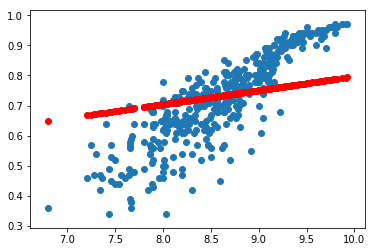

In [150]:
m, n = X_1.shape

theta_0 = np.random.rand(n, 1)
theta, costs = gradient_descent_reg(
    X_1,
    y,
    theta_0,
    alpha=0.000001,
    lambdaf=5,
    num_iters=100000
)

# Plot training data
plt.scatter(X_1[:, 1], y)
plt.scatter(X_1[:, 1], np.matmul(X_1, theta), color='red')

# Si los costos quieren ser graficados, se realiza acá
#plt.plot(np.arange(len(costs)), costs)

plt.show()

### Utilizando como base GRE (Implementación propia)

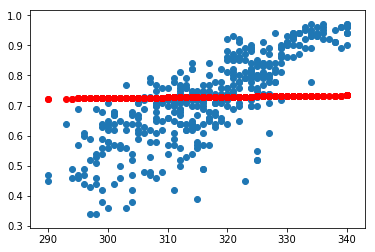

In [156]:
m, n = X_2.shape

theta_0 = np.random.rand(n, 1)
theta, costs = gradient_descent_reg(
    X_2,
    y,
    theta_0,
    alpha=0.000001,
    lambdaf=4,
    num_iters=100000
)

# Plot training data
plt.scatter(X_2[:, 1], y)
plt.scatter(X_2[:, 1], np.matmul(X_2, theta), color='red')

# Si los costos quieren ser graficados, se realiza acá
#plt.plot(np.arange(len(costs)), costs)

plt.show()

#### Es posible observar que las predicciones no son tan exactas con una variable, por lo que se realizarán diferentes combinaciones de data para obtener un mejor modelo de predicción que solamente utilizando variables individuales.

### Utilizando como base GRE y GPA cuadrado (Implementación propia)

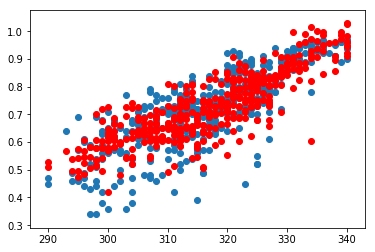

In [157]:
m, n = X_3.shape

theta_0 = np.random.rand(n, 1)
theta, costs = gradient_descent_reg(
    X_3,
    y,
    theta_0,
    alpha=0.000001,
    lambdaf=4,
    num_iters=100000
)

# Plot training data
plt.scatter(X_3[:, 1], y)
plt.scatter(X_3[:, 1], np.matmul(X_3, theta), color='red')

# Si los costos quieren ser graficados, se realiza acá
#plt.plot(np.arange(len(costs)), costs)

plt.show()

### Utilizando como base TOEFL y GPA (Implementación propia)

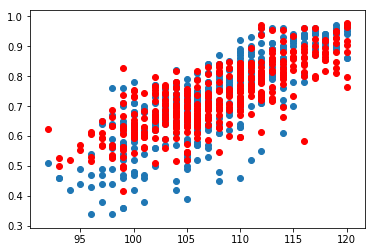

In [158]:
m, n = X_4.shape

theta_0 = np.random.rand(n, 1)
theta, costs = gradient_descent_reg(
    X_4,
    y,
    theta_0,
    alpha=0.000001,
    lambdaf=4,
    num_iters=100000
)

# Plot training data
plt.scatter(X_4[:, 1], y)
plt.scatter(X_4[:, 1], np.matmul(X_4, theta), color='red')

# Si los costos quieren ser graficados, se realiza acá
#plt.plot(np.arange(len(costs)), costs)

plt.show()

### Utilizando como base TOEFL, GPA, GRE (Implementación propia)

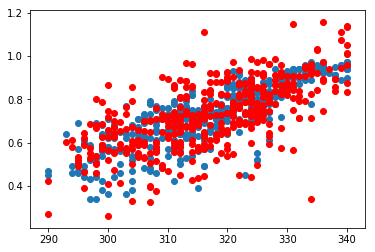

In [144]:
m, n = X_5.shape

theta_0 = np.random.rand(n, 1)
theta, costs = gradient_descent_reg(
    X_5,
    y,
    theta_0,
    alpha=0.000001,
    lambdaf=4,
    num_iters=100000
)

# Plot training data
plt.scatter(X_5[:, 1], y)
plt.scatter(X_5[:, 1], np.matmul(X_5, theta), color='red')

# Si los costos quieren ser graficados, se realiza acá
#plt.plot(np.arange(len(costs)), costs)

plt.show()

# Conclusiones

#### 1. La mejor predicción es proveída al utilizar varias variables.

#### 2. Si se utilizan varias variables, es necesario escalar los datos para que obtener un mejor modelo. (Por ejemplo, fue necesario escalar el GPA para que cuadrara con los demás datos)

#### 3. GPA aporta para obtener una buena predicción, al realizar varias combinaciones no presentadas en el notebook, las mejores predicciones incluían GPA siempre. Es un buen indicador para calcular una predicción acertada, sin embargo, se debe usar en combinación a otras variables debido a que utilizandola de manera singular, no provee una predicción tan acertada como se puede observar en la primera gráfica.

#### 4. El valor de lambda de 4 es un buen valor para realizar la regresión lineal debido a que provee un buen balance entre simplicidad y un buen ajuste para los datos de entrenamiento. Considero que no se realiza un overfitting o underfitting muy excesivo con este valor.